<a href="https://colab.research.google.com/github/ISMAELSOUSAFONTELESCASTRO/notebook/blob/main/An%C3%A1lise_de_Risco_e_Probabilidade_de_Eventos_Extremos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necessárias.

In [287]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import genextreme
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fazendo o preprocessamento dos dados.

In [288]:
# Carregar os dados
filename = 'owid-covid-data.csv'
data = pd.read_csv(filename)

data['date'] = pd.to_datetime(data['date'])

# Substituindo valores nulos pela média das colunas numéricas
data = data.fillna(data.select_dtypes(include=['number']).mean())

# Normalizando os dados numéricos
scaler = MinMaxScaler()
numerical_data = data.select_dtypes(include=['number'])
normalized_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

non_numerical_data = data.select_dtypes(exclude=['number'])

# Concatenando os dados normalizados e os dados codificados
dataNormalized = pd.concat([non_numerical_data, normalized_numerical_data], axis=1)

print(dataNormalized.describe())
print(data.dtypes)

                                date    total_cases      new_cases  \
count                         103143  103143.000000  103143.000000   
mean   2020-11-13 16:47:01.279194880       0.005920       0.082032   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2020-07-10 00:00:00       0.000008       0.075841   
50%              2020-11-19 00:00:00       0.000092       0.075933   
75%              2021-03-23 00:00:00       0.001092       0.076941   
max              2021-07-17 00:00:00       1.000000       1.000000   
std                              NaN       0.039572       0.037771   

       new_cases_smoothed   total_deaths     new_deaths  new_deaths_smoothed  \
count       103143.000000  103143.000000  103143.000000        103143.000000   
mean             0.014781       0.007367       0.103302             0.024297   
min              0.000000       0.000000       0.000000             0.000000   
25%              0.007485       0.000019       0.

# Analisando média, mediana, desvio padrão, máximo e mínimo.

In [289]:
media = dataNormalized['new_deaths'].mean()
mediana = dataNormalized['new_deaths'].median()
desvioPadrao = dataNormalized['new_deaths'].std()
maximo = dataNormalized['new_deaths'].max()
minimo = dataNormalized['new_deaths'].min()
print("Media", media)
print("Mediana", mediana)
print("Desvio Padrão", desvioPadrao)
print("Máximo", maximo)
print("Mínimo", minimo)

Media 0.10330197229229252
Mediana 0.09620582640904995
Desvio Padrão 0.03709074911437072
Máximo 1.0
Mínimo 0.0



# **Evolução Temporal dos Novos Casos de Covid-19 no Brasil**

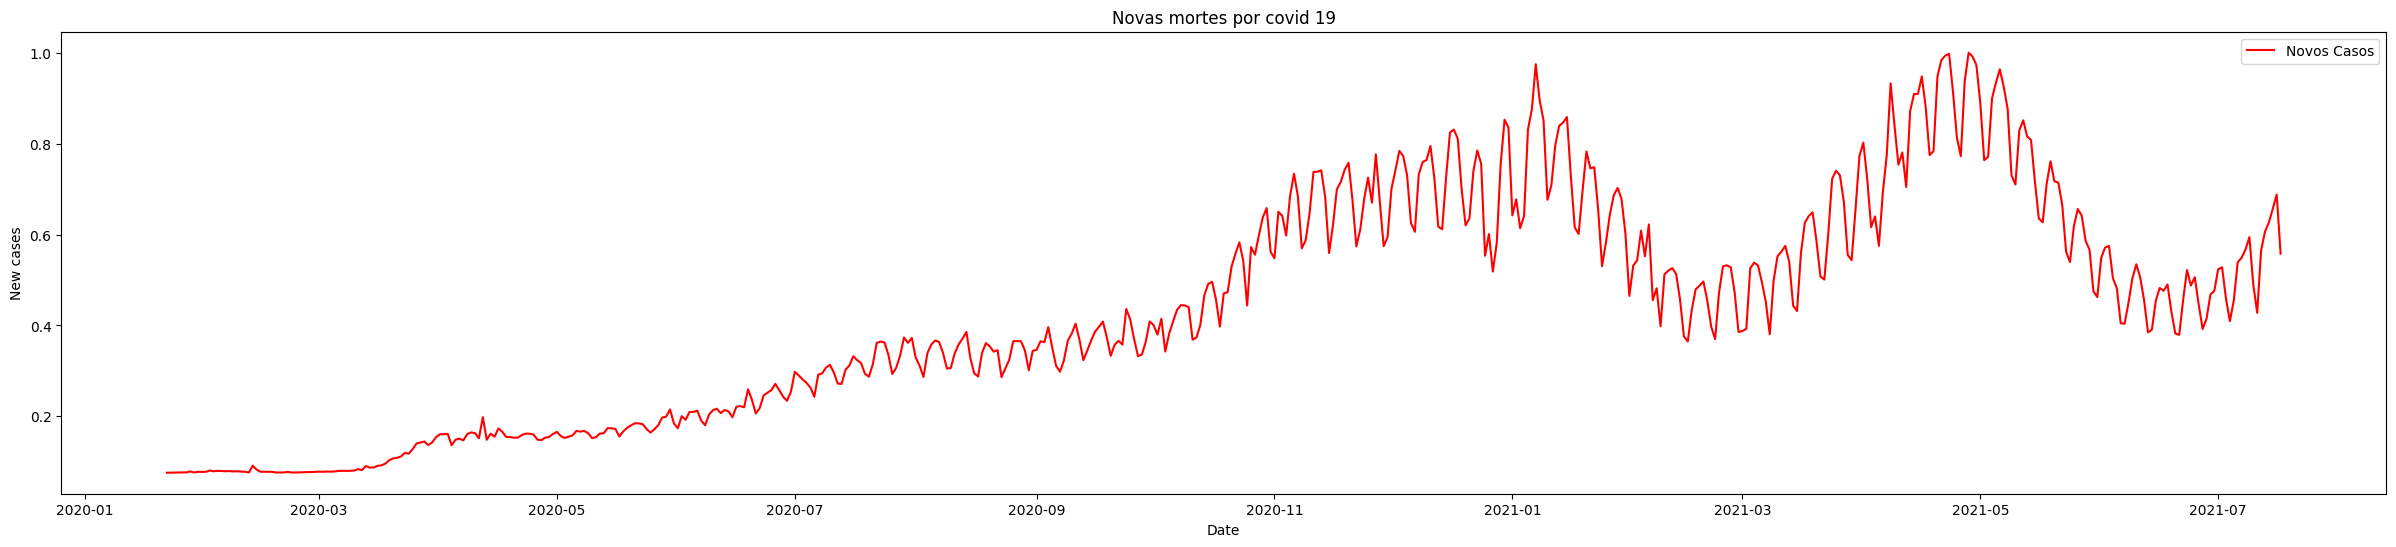

In [290]:
brazil_data = dataNormalized[dataNormalized['location'] == 'World']
plt.figure(figsize=(30, 6))
plt.plot(brazil_data['date'], brazil_data['new_cases'], label = 'Novos Casos', color = 'red')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.title('Novas mortes por covid 19')
plt.legend()
plt.show()

# **Decomposição da Série Temporal**

<ipython-input-291-45de5cb81945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_data['date'] = pd.to_datetime(brazil_data['date'])


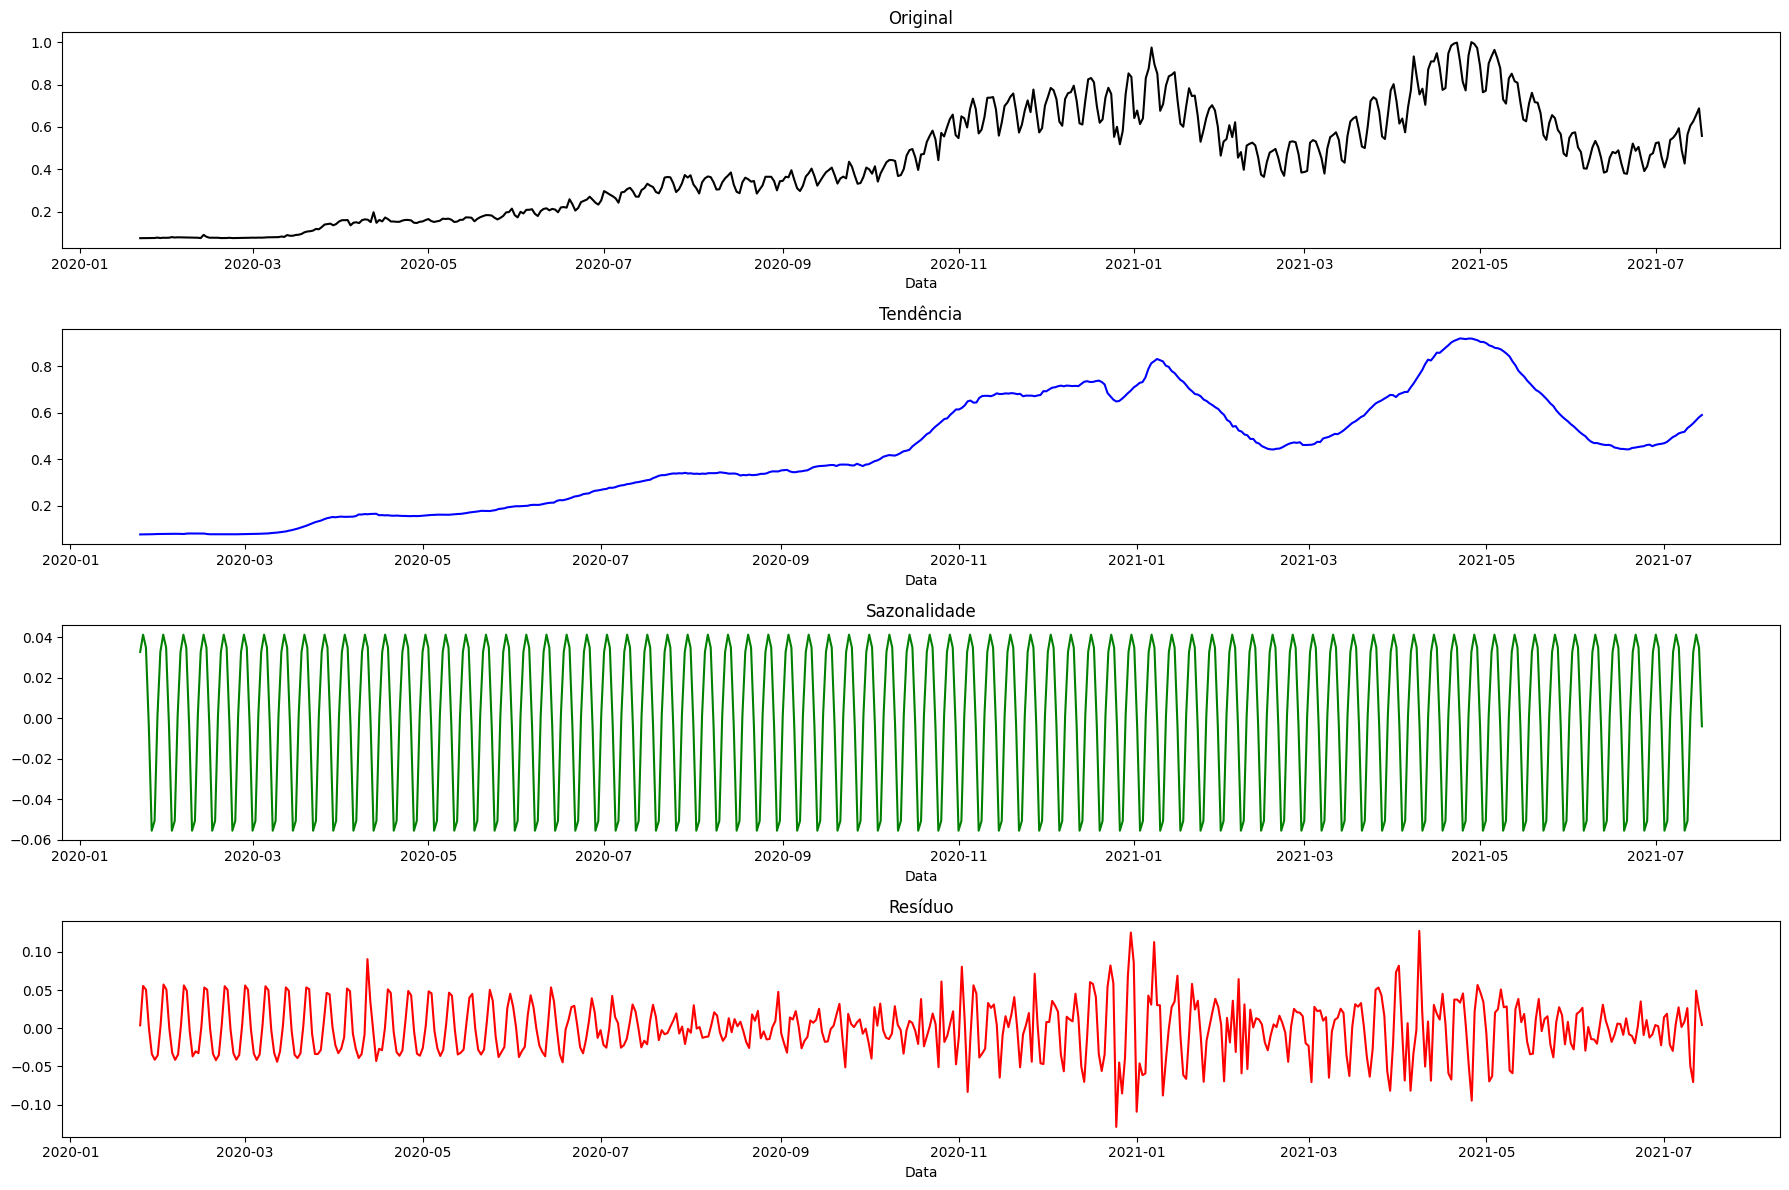

In [291]:

brazil_data['date'] = pd.to_datetime(brazil_data['date'])
brazil_data.set_index('date', inplace=True)

# Decompor a série temporal
decomposition = seasonal_decompose(brazil_data['new_cases'], model='additive')  # ou model='multiplicative'

# Plotar os componentes
plt.figure(figsize=(18, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed.index, brazil_data['new_cases'], label='Original', color='black')
plt.title('Original')
plt.xlabel('Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend.index, decomposition.trend, label='Tendência', color='blue')
plt.title('Tendência')
plt.xlabel('Data')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.xlabel('Data')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid.index, decomposition.resid, label='Resíduo', color='red')
plt.title('Resíduo')
plt.xlabel('Data')

plt.tight_layout()
plt.show()

# **Análise de Autocorrelação: Função ACF**

<Figure size 2000x600 with 0 Axes>

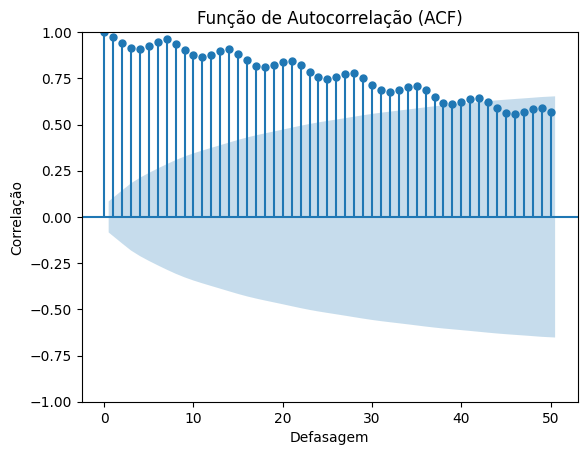

In [292]:
# Plotar ACF
plt.figure(figsize=(20, 6))
plot_acf(brazil_data['new_cases'], lags=50, alpha=0.05, use_vlines=True)
plt.title('Função de Autocorrelação (ACF)')
plt.xlabel('Defasagem')
plt.ylabel('Correlação')
plt.show()

# **Análise de Autocorrelação Parcial: Função PACF**

<Figure size 1000x600 with 0 Axes>

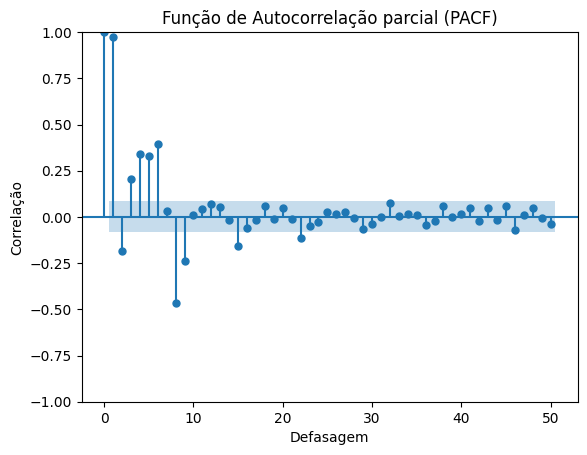

In [293]:
plt.figure(figsize=(10, 6))
plot_pacf(brazil_data['new_cases'], lags=50, alpha=0.05, use_vlines=True)
plt.title('Função de Autocorrelação parcial (PACF)')
plt.xlabel('Defasagem')
plt.ylabel('Correlação')
plt.show()


# **Teste de Raiz Unitária: Verificação de Estacionaridade com ADF**

In [294]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(brazil_data['new_cases'].dropna())
print(f'p-value: {result[1]}')

p-value: 0.37477679876822845


# **Análise Estatística: Valores Mínimo e Máximo**

In [295]:
print(brazil_data['new_cases'].min())
print(brazil_data['new_cases'].max())

0.07583797458024767
1.0


# **Modelagem de Eventos Extremos: Probabilidade de Casos Novos Acima do Limite de 95%**

In [296]:
new_cases = brazil_data['new_cases']


params = genextreme.fit(new_cases)
c, loc, scale = params



# Definindo um limite para eventos extremos
threshold = new_cases.quantile(0.95)  # 95% dos casos

# Estimando a probabilidade de ocorrência de um evento extremo
probability_extreme = 1 - genextreme.cdf(threshold, c, loc=loc, scale=scale)
print(f"A probabilidade de ocorrência de novos casos extremos acima de {threshold:.2f} é {probability_extreme:.4f}.")


A probabilidade de ocorrência de novos casos extremos acima de 0.85 é 0.0496.


# **Visualização da Distribuição EVT**

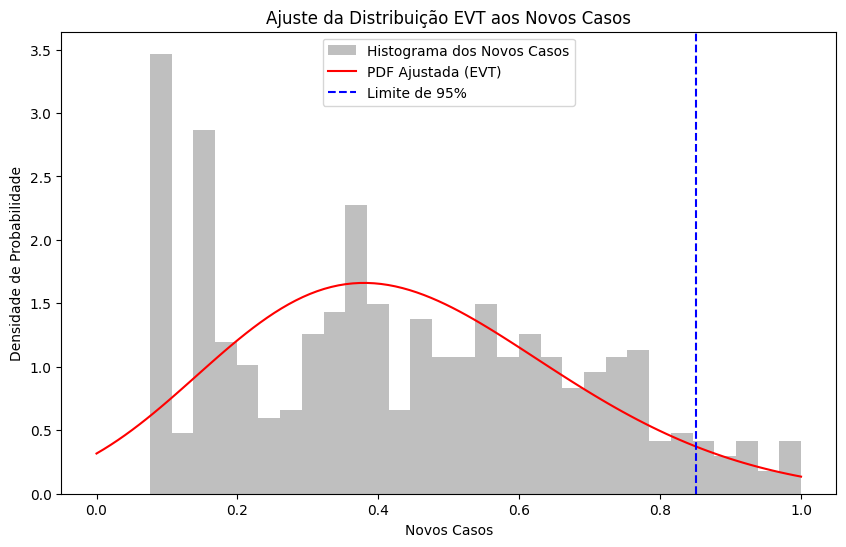

In [297]:
# Gerando valores para a distribuição ajustada
x = np.linspace(0, new_cases.max(), 100)
pdf_fitted = genextreme.pdf(x, c, loc=loc, scale=scale)

# Plotando a distribuição dos novos casos e a PDF ajustada
plt.figure(figsize=(10, 6))
plt.hist(new_cases, bins=30, density=True, alpha=0.5, color='gray', label='Histograma dos Novos Casos')
plt.plot(x, pdf_fitted, 'r-', label='PDF Ajustada (EVT)')
plt.axvline(threshold, color='blue', linestyle='--', label='Limite de 95%')
plt.title('Ajuste da Distribuição EVT aos Novos Casos')
plt.xlabel('Novos Casos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()
